In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
plt.style.use('seaborn-v0_8-ticks')



In [252]:
cardata = pd.read_csv('data/vehicles.csv')

# Cleaning the data

In [253]:
print(cardata.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [254]:
print(cardata.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [255]:
print(cardata.isna().mean())

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
image_url       0.000159
description     0.000164
county          1.000000
state           0.000000
lat             0.015342
long            0.015342
posting_date    0.000159
dtype: float64


In [256]:
print(cardata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Dropping a bunch of columns.  SOme such as URL, region url, decscription, and image url are not useful here.  Others, like VIN, county, and drive, have a very high percentage of missing values.

In [257]:
columns_to_drop = ['url', 'region', 'region_url', 'VIN', 'title_status', 'cylinders', 'condition', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county']
cardata.drop(columns=columns_to_drop, inplace=True)
print(cardata.columns)

Index(['id', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'transmission', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')


In [258]:
print(cardata.isnull().sum())

id                  0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
transmission     2556
state               0
lat              6549
long             6549
posting_date       68
dtype: int64


In [259]:
cardata = cardata[cardata['price'] != 0]
cardata = cardata[cardata['odometer'] != 0]


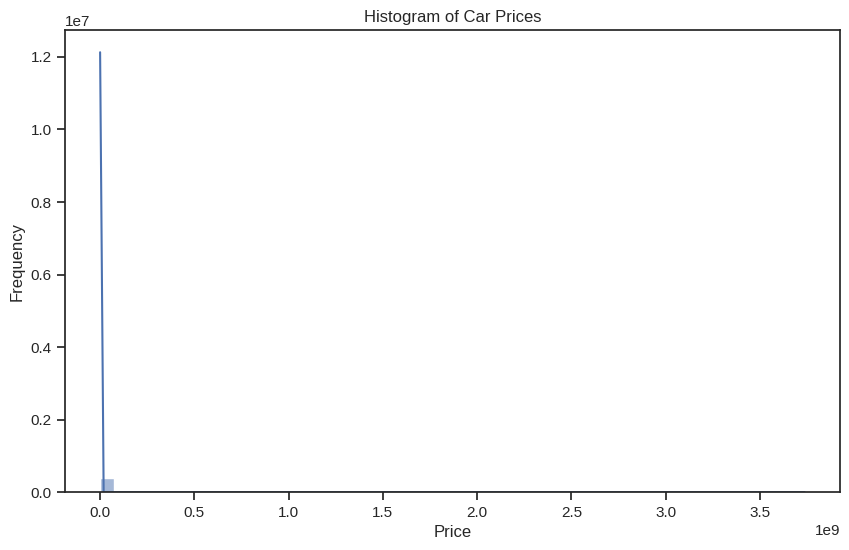

In [260]:
plt.figure(figsize=(10, 6))
sns.histplot(cardata['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

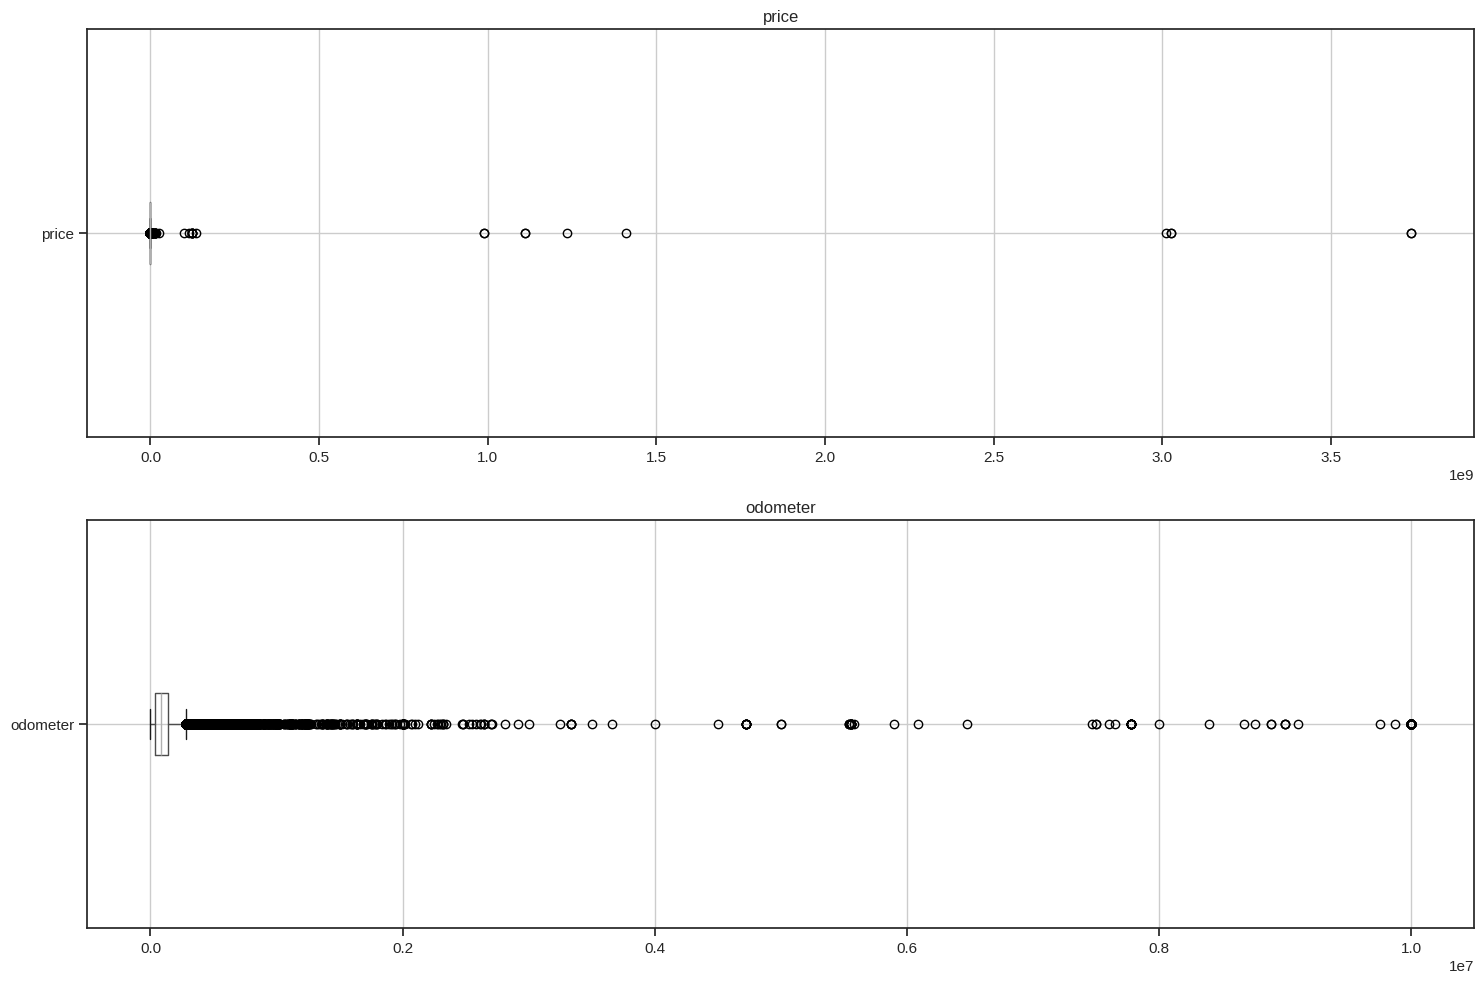

In [261]:
numeric_columns = cardata.select_dtypes(include=[np.number]).columns.drop(['id', 'year', 'lat', 'long'])
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(15, 10))

for ax, column in zip(axes, numeric_columns):
    cardata.boxplot(column=column, ax=ax, vert=False)
    ax.set_title(column)

plt.tight_layout()
plt.show()

price has some crazy large outliers!  Dropping everything over 60,000 dollars.Odometer too!  Are there really cars out there with 1 billion miles on them?  Dropping everything over 300,000 miles.

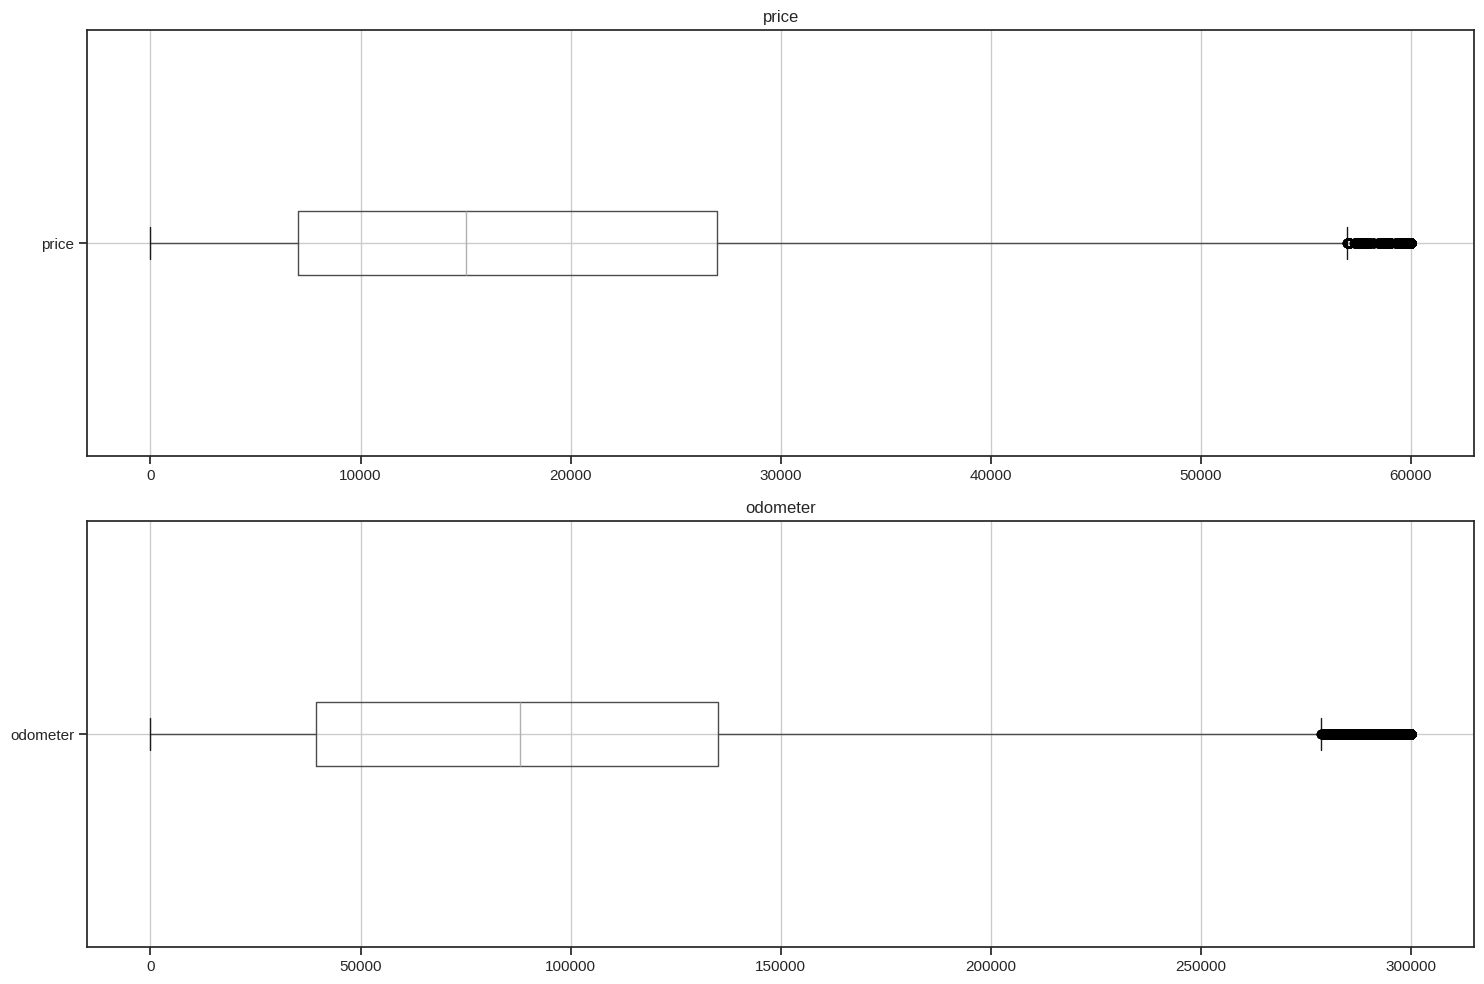

In [262]:
cardata = cardata[cardata['price'] <= 60000]
cardata = cardata[cardata['odometer'] <= 300000]
numeric_columns = cardata.select_dtypes(include=[np.number]).columns.drop(['id', 'year', 'lat', 'long'])
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(15, 10))

for ax, column in zip(axes, numeric_columns):
    cardata.boxplot(column=column, ax=ax, vert=False)
    ax.set_title(column)

plt.tight_layout()
plt.show()

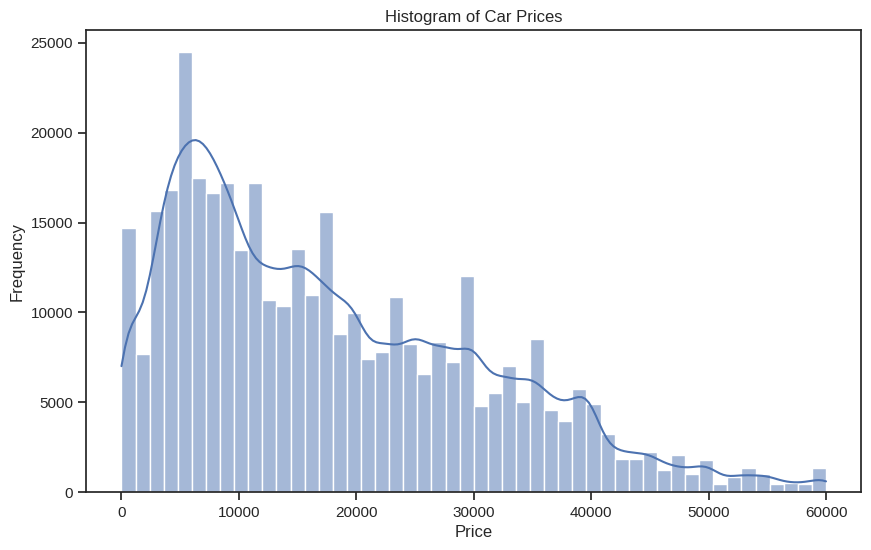

In [263]:
plt.figure(figsize=(10, 6))
sns.histplot(cardata['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [264]:
cardata.dropna(subset=['year', 'model', 'manufacturer', 'odometer'], inplace=True)

print(cardata.head())

            id  price    year manufacturer                     model fuel  \
27  7316814884  33590  2014.0          gmc  sierra 1500 crew cab slt  gas   
28  7316814758  22590  2010.0    chevrolet            silverado 1500  gas   
29  7316814989  39590  2020.0    chevrolet       silverado 1500 crew  gas   
30  7316743432  30990  2017.0       toyota      tundra double cab sr  gas   
31  7316356412  15000  2013.0         ford                 f-150 xlt  gas   

    odometer transmission state     lat     long              posting_date  
27   57923.0        other    al  32.590 -85.4800  2021-05-04T12:31:18-0500  
28   71229.0        other    al  32.590 -85.4800  2021-05-04T12:31:08-0500  
29   19160.0        other    al  32.590 -85.4800  2021-05-04T12:31:25-0500  
30   41124.0        other    al  32.590 -85.4800  2021-05-04T10:41:31-0500  
31  128000.0    automatic    al  32.592 -85.5189  2021-05-03T14:02:03-0500  


In [266]:
manufacturer_percentages = cardata['manufacturer'].value_counts(normalize=True) * 100
print(manufacturer_percentages)

manufacturer
ford               16.956059
chevrolet          13.196802
toyota              8.493597
honda               5.374934
nissan              4.718083
jeep                4.706511
ram                 4.074733
gmc                 3.965350
bmw                 3.711592
dodge               3.279845
mercedes-benz       2.727418
hyundai             2.545572
subaru              2.451893
volkswagen          2.401472
lexus               2.094538
kia                 2.060097
audi                1.909110
cadillac            1.721753
acura               1.551479
chrysler            1.523651
buick               1.396359
mazda               1.365775
infiniti            1.219747
lincoln             1.075097
mitsubishi          0.848065
volvo               0.836493
mini                0.614420
pontiac             0.595684
jaguar              0.513578
rover               0.445248
porsche             0.316578
mercury             0.305832
saturn              0.288199
alfa-romeo          0.231716
t

In [267]:
fuel_percentages = cardata['fuel'].value_counts(normalize=True) * 100
print(fuel_percentages)

fuel
gas         85.765649
other        7.189749
diesel       5.316691
hybrid       1.317400
electric     0.410510
Name: proportion, dtype: float64


In [268]:
transmission_percentages = cardata['transmission'].value_counts(normalize=True) * 100
print(transmission_percentages)

transmission
automatic    78.297117
other        16.296110
manual        5.406773
Name: proportion, dtype: float64


In [269]:
model_percentages = cardata.groupby(['manufacturer', 'model']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(model_percentages)

manufacturer  manufacturer  model                 
acura         acura         2002 rsx type s           0.017759
                            3.0cl                     0.053277
                            3.2 cl type s             0.088794
                            3.2 tl                    0.248624
                            3.2 tl - sport            0.017759
                                                        ...   
volvo         volvo         xc90 t8 inscription       0.032938
                            xc90 v8                   0.098814
                            xc90 v8 awd               0.032938
                            xc90 v8 awdsuv            0.032938
                            xc90t6 awd 24733 miles    0.494071
Length: 22094, dtype: float64


In [265]:
print(cardata.isnull().sum())

id                 0
price              0
year               0
manufacturer       0
model              0
fuel            1930
odometer           0
transmission    1416
state              0
lat             3300
long            3300
posting_date       0
dtype: int64


# Exploratory Data Analysis